In [1]:
import gzip

import numpy as np
import matplotlib.pyplot as plt

from nnfs.models import BaseModel
from nnfs.layers import LinearLayer, Conv2DLayer, FlattenLayer
from nnfs.funcs import CrossEntropy
from nnfs.optimizers import Adam

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Fashion MNIST is a more complex version of the classic MNIST dataset, containing images of various articles of clothing with the goal of classifying the type of clothing from the image. The data used in this example is available [here](https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion). To run this next code block, place the data in `examples/data/fashion/` with the appropriate filenames.

For this example, a convolutional neural network will be used, utilizing the original image file type. In addition, the more robust Adam optimizer will be used during training. 

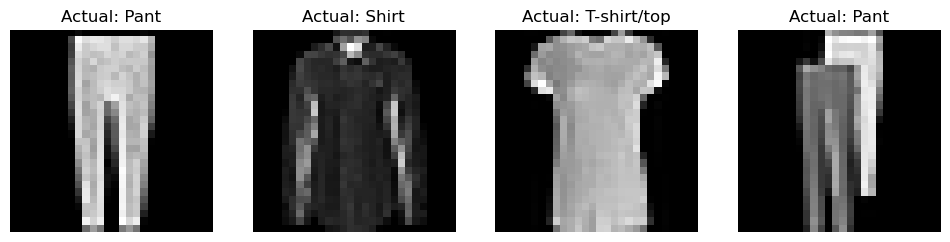

In [2]:
# Load datasets into numpy arrays
with gzip.open("data/fashion/train-images-idx3-ubyte.gz", "rb") as file:
    train_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with gzip.open("data/fashion/t10k-images-idx3-ubyte.gz", "rb") as file:
    test_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28, 28)

with gzip.open("data/fashion/train-labels-idx1-ubyte.gz", "rb") as file:
    train_labels = np.frombuffer(file.read(), np.uint8, offset=8)
with gzip.open("data/fashion/t10k-labels-idx1-ubyte.gz", "rb") as file:
    test_labels = np.frombuffer(file.read(), np.uint8, offset=8)

# Convert index into item name
fashion_key = {
    0: "T-shirt/top",
    1: "Pant",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

def draw_sample_image(train_image, train_class, output_class = None):
    """Helper function to draw and label clothing article"""
    # Number of graphs
    nums = train_image.shape[0]

    # Loop and graph
    fig, axes = plt.subplots(1, nums)
    for i in range(nums):
        axes[i].imshow(train_image[i], cmap="gray")
        actual_name = fashion_key[train_class[i]]
        title_str = f"Actual: {actual_name}"
        if output_class is not None:
            pred_name = fashion_key[output_class[i]]
            title_str += f"\nPredicted: {pred_name}"
        axes[i].set_title(title_str)
        axes[i].set_axis_off()
    fig.set_size_inches(3 * nums, 3)
    plt.show()

# Confirm images and labels are aligned
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_sample_image(train_image[rand_inds], train_labels[rand_inds])

# Adjust labels to correspond to class output
train_label_arr = np.zeros((train_labels.shape[0], 10), dtype=int)
train_label_arr[np.arange(train_labels.shape[0]), train_labels] = 1
test_label_arr = np.zeros((test_labels.shape[0], 10), dtype=int)
test_label_arr[np.arange(test_labels.shape[0]), test_labels] = 1

# Convert from (0, 255) to (0, 1) range
train_image = train_image.copy() / 256
test_image = test_image.copy() / 256

In [3]:
layers = [
    Conv2DLayer((28, 28), (26, 26), (3, 3)),
    FlattenLayer((26, 26), (26 * 26)),
    LinearLayer((26 * 26), (100)),
    LinearLayer((100), (10))
]

# Train model
model = BaseModel(layers, optimizer = Adam(learning_rate=0.001))
model.train(
    [train_image, train_label_arr],
    [test_image, test_label_arr],
    CrossEntropy(),
    batch_size = 128,
    epochs = 20,
    full_test = True
)

Initialized model with 68719 parameters (268.4 KB).
Start of Epoch 1:


100%|██████████| 468/468 [00:27<00:00, 16.72it/s]


Average loss at epoch 1: 1.06148
Start of Epoch 2:


100%|██████████| 468/468 [00:23<00:00, 20.07it/s]


Average loss at epoch 2: 0.96782
Start of Epoch 3:


100%|██████████| 468/468 [00:26<00:00, 17.62it/s]


Average loss at epoch 3: 0.90989
Start of Epoch 4:


100%|██████████| 468/468 [00:27<00:00, 17.21it/s] 


Average loss at epoch 4: 0.89685
Start of Epoch 5:


100%|██████████| 468/468 [00:23<00:00, 19.66it/s] 


Average loss at epoch 5: 0.79862
Start of Epoch 6:


100%|██████████| 468/468 [00:21<00:00, 21.43it/s] 


Average loss at epoch 6: 0.70618
Start of Epoch 7:


100%|██████████| 468/468 [00:20<00:00, 22.54it/s] 


Average loss at epoch 7: 0.76326
Start of Epoch 8:


100%|██████████| 468/468 [00:23<00:00, 19.83it/s]


Average loss at epoch 8: 0.73894
Start of Epoch 9:


100%|██████████| 468/468 [00:22<00:00, 21.21it/s]


Average loss at epoch 9: 0.75569
Start of Epoch 10:


100%|██████████| 468/468 [00:20<00:00, 22.91it/s] 


Average loss at epoch 10: 0.68410
Start of Epoch 11:


100%|██████████| 468/468 [00:27<00:00, 16.87it/s]


Average loss at epoch 11: 0.74615
Start of Epoch 12:


100%|██████████| 468/468 [00:29<00:00, 15.83it/s] 


Average loss at epoch 12: 0.73913
Start of Epoch 13:


100%|██████████| 468/468 [00:29<00:00, 15.88it/s] 


Average loss at epoch 13: 0.75909
Start of Epoch 14:


100%|██████████| 468/468 [00:33<00:00, 14.08it/s]


Average loss at epoch 14: 0.71386
Start of Epoch 15:


100%|██████████| 468/468 [00:29<00:00, 15.92it/s]


Average loss at epoch 15: 0.68472
Start of Epoch 16:


100%|██████████| 468/468 [00:28<00:00, 16.23it/s]


Average loss at epoch 16: 0.72137
Start of Epoch 17:


100%|██████████| 468/468 [00:29<00:00, 15.61it/s]


Average loss at epoch 17: 0.76748
Start of Epoch 18:


100%|██████████| 468/468 [00:25<00:00, 18.21it/s]


Average loss at epoch 18: 0.68819
Start of Epoch 19:


100%|██████████| 468/468 [00:22<00:00, 21.06it/s] 


Average loss at epoch 19: 0.67240
Start of Epoch 20:


100%|██████████| 468/468 [00:21<00:00, 21.71it/s] 


Average loss at epoch 20: 0.76282
Training took  0h  9m 51s.


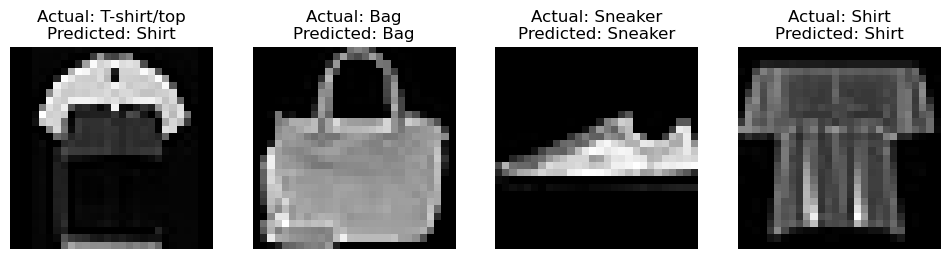

The model accuracy over the entire test set is 79.88%.


In [6]:
# Check if model can accurately label images
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
model_guess = np.argmax(model.forward(train_image[rand_inds]), axis=1)
actual_val = train_labels[rand_inds]
draw_sample_image(train_image[rand_inds], actual_val, model_guess)

# Find percent accuracy over entire test set
test_vals = model.forward(test_image)
test_accuracy = np.count_nonzero(np.argmax(test_vals, axis=1) == test_labels) / test_image.shape[0]
print(f"The model accuracy over the entire test set is {100 * test_accuracy:.2f}%.")

As shown, the model has a ~80% accuracy, likely due to the similarities between the various clothing categories (e.g, T-shirt and shirt) and the low quality of the input images. However, for a ~300 KB model that trained in under 10 minutes, this result is reasonable.